# P1. Exploration

## 1. Description Générale

En utilisant DBeaver et les paramètres de connexion donnés par ailleurs, faire une description détaillée de la base de données fournie. Présenter notamment le diagramme entité - relation (ERD) et les différentes caractéristiques des tables de la base.  Quelles types de renseignement peut-on tirer de cette base de données ?   

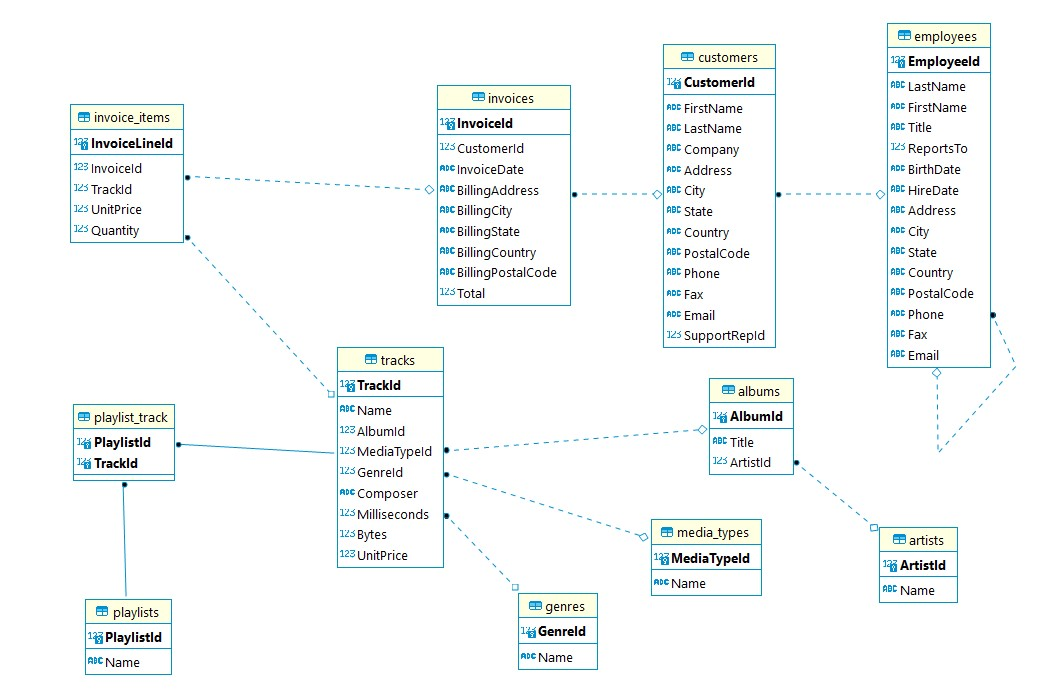

In [9]:
from IPython.display import Image
Image("Snaps/01.jpg")

---

## 2. Exploration SQL via python / pandas
Dans cette partie, on s'attache à explorer la base de données en utilisant le language SQL pour les requêtes et le language Python (+ module pandas) pour récupérer les résultats de façon programmatique.  
Vous pouvez utiliser DBeaver ou outil similaire pour préparer / tester vos requêtes mais celles-ci doivent être reportées et appliquées dans du code Python comme présenté dans les quelques examples à suivre.  
*Pour les résultats "longs", un aperçu des quelques premières lignes et le comptage total des résultats est suffisant.*

In [9]:
import os
import sqlite3
import pandas as pd

In [10]:
from pathlib import Path

In [11]:
# Ouvre connection vers SQLite db
chemin_bdd = Path('db') / 'chinook.db'
conn = sqlite3.connect(chemin_bdd)

### Organigramme Compagnie

Q01. Ecrivez et exécutez une unique requête listant chaque employée de la compagnie (Id, nom + prénom, Titre) ainsi que son manager direct (nom + prénom, Titre)

In [20]:
# requête de départ
query = """
    SELECT e.firstname || ' ' || e.lastname AS 'Supérieur',
    f.firstname || ' ' || f.lastname AS 'Employé'
    FROM employees f
    LEFT JOIN employees e ON e.EmployeeId=f.ReportsTo
"""

In [21]:
results = pd.read_sql_query(query, conn)
results

,Supérieur,Employé
0,None,Andrew Adams
1,Andrew Adams,Nancy Edwards
2,Nancy Edwards,Jane Peacock
3,Nancy Edwards,Margaret Park
4,Nancy Edwards,Steve Johnson
5,Andrew Adams,Michael Mitchell
6,Michael Mitchell,Robert King
7,Michael Mitchell,Laura Callahan


Q02. Pour chaque artiste présent dans cette BDD, indiquez le nombre d'albums de cet artiste également répertorié (Liste triée par nom d'artiste)


In [16]:
query2 = """
    SELECT artists.name AS 'Groupe', count(albums.title) AS "Nombre d'albums"
    FROM artists
    LEFT JOIN albums ON artists.ArtistId=albums.ArtistId
    GROUP BY artists.name
    ORDER BY "Nombre d'albums" DESC, artists.name ASC
    LIMIT 20
"""

In [17]:
results2 = pd.read_sql_query(query2, conn)
results2

,Groupe,Nombre d'albums
0,Iron Maiden,21
1,Led Zeppelin,14
2,Deep Purple,11
3,Metallica,10
4,U2,10
5,Ozzy Osbourne,6
6,Pearl Jam,5
7,Faith No More,4
8,Foo Fighters,4
9,Lost,4


Q03. Produire une liste des albums reprenant également l'artiste de l'album, le nombre de pistes, la durée de toutes les pistes (en minutes) et le coût total (Liste triée par artiste puis nom d'album)


In [30]:
query3 = """
   SELECT b.Name, a.Title, count(a.Title) AS "Nbre pistes", SUM(c.Milliseconds/60000) AS "Minutes", SUM(c.UnitPrice) AS "Coût"
   FROM albums a 
   LEFT JOIN artists b ON a.ArtistId=b.ArtistId
   LEFT JOIN tracks c ON a.AlbumId=c.AlbumId
   GROUP BY a.Title
   ORDER BY b.Name ASC, a.Title ASC
   LIMIT 20
   """

In [31]:
results3 = pd.read_sql_query(query3, conn)
results3

,Name,Title,Nbre pistes,Minutes,Coût
0,AC/DC,For Those About To Rock We Salute You,10,35,9.90
1,AC/DC,Let There Be Rock,8,38,7.92
2,Aaron Copland & London Symphony Orchestra,"A Copland Celebration, Vol. I",1,3,0.99
3,Aaron Goldberg,Worlds,1,4,0.99
4,Academy of St. Martin in the Fields & Sir Nevi...,The World of Classical Favourites,2,7,1.98
5,Academy of St. Martin in the Fields Chamber En...,Sir Neville Marriner: A Celebration,1,5,0.99
6,"Academy of St. Martin in the Fields, John Birc...","Fauré: Requiem, Ravel: Pavane & Others",1,4,0.99
7,"Academy of St. Martin in the Fields, Sir Nevil...",Bach: Orchestral Suites Nos. 1 - 4,1,3,0.99
8,Accept,Balls to the Wall,1,5,0.99
9,Accept,Restless and Wild,3,13,2.97


Q04. Produire une liste des toutes les playlists reprenant son nom, le nombre de pistes, la durée de toutes les pistes (en minutes) et le coût total (Liste triée par nom de playlist)


In [62]:
query4 = """
   SELECT a.Name, count(b.TrackId) AS "Nbre pistes", COALESCE((SUM(c.Milliseconds)/60000),0) AS "Temps", COALESCE(SUM(c.UnitPrice),0) AS "Coût"
   FROM playlists a
   LEFT JOIN playlist_track b ON a.PlaylistId=b.PlaylistId 
   LEFT JOIN tracks c ON b.TrackId=c.TrackId 
   GROUP BY a.PlaylistId 
   ORDER BY a.Name ASC
   """

In [63]:
results4 = pd.read_sql_query(query4, conn)
results4

,Name,Nbre pistes,Temps,Coût
0,90’s Music,1477,6645,1462.23
1,Audiobooks,0,0,0.00
2,Audiobooks,0,0,0.00
3,Brazilian Music,39,158,38.61
4,Classical,75,362,74.25
5,Classical 101 - Deep Cuts,25,112,24.75
6,Classical 101 - Next Steps,25,126,24.75
7,Classical 101 - The Basics,25,123,24.75
8,Grunge,15,68,14.85
9,Heavy Metal Classic,26,136,25.74


Q05. Produire une liste de tous les genres de musique reprenant son genre, le nombre de pistes, la durée de toutes les pistes (en minutes), le coût total et le coût moyen (Liste triée par nom de genre)


In [64]:
query5 = """
   SELECT a.Name, count(b.TrackId) AS "Nbre pistes", COALESCE((SUM(b.Milliseconds)/60000),0) AS "Temps", 
  COALESCE(SUM(b.UnitPrice),0) AS "Coût", COALESCE(AVG(b.UnitPrice),0) AS "Coût moyen"
  FROM genres a
  LEFT JOIN tracks b ON a.GenreId=b.GenreId
  GROUP BY a.GenreId
  ORDER BY a.Name ASC
   """

In [65]:
results5 = pd.read_sql_query(query5, conn)
results5

,Name,Nbre pistes,Temps,Coût,Coût moyen
0,Alternative,40,176,39.60,0.99
1,Alternative & Punk,332,1296,328.68,0.99
2,Blues,81,364,80.19,0.99
3,Bossa Nova,15,54,14.85,0.99
4,Classical,74,362,73.26,0.99
5,Comedy,17,449,33.83,1.99
6,Drama,64,2746,127.36,1.99
7,Easy Listening,24,75,23.76,0.99
8,Electronica/Dance,30,151,29.70,0.99
9,Heavy Metal,28,138,27.72,0.99


Q06. Indiquez les caractéristiques principales de toutes les pistes correspondant au genre 'Science Fiction' (nom de piste, album, artiste de l'album, compositeur, nom du type de media, durée (en secondes) et prix unitaire


In [58]:
query6 = """
   SELECT b.Name , c.Title, COALESCE((d.Name), "None") AS "Artiste", COALESCE((b.Composer), "None") AS "Compositeur", c2.Name AS "Format", 
   COALESCE((b.Milliseconds/1000), "None") AS "Durée", COALESCE((b.UnitPrice), "None") AS "Prix"
   FROM genres a
   LEFT JOIN tracks b ON a.GenreId=b.GenreId
   LEFT JOIN albums c ON b.AlbumId=c.AlbumId
   LEFT JOIN media_types c2 ON b.MediaTypeId=c2.MediaTypeId
   LEFT JOIN artists d ON c.ArtistId=C.AlbumId
   WHERE a.Name = "Science Fiction"
   ORDER BY b.Name ASC
   """

In [59]:
results6 = pd.read_sql_query(query6, conn)
results6

,Name,Title,Artiste,Compositeur,Format,Durée,Prix
0,A Day In the Life,"Battlestar Galactica, Season 3",None,None,Protected MPEG-4 video file,2620,1.99
1,A Measure of Salvation,"Battlestar Galactica, Season 3",None,None,Protected MPEG-4 video file,2563,1.99
2,Battlestar Galactica: The Story So Far,Battlestar Galactica: The Story So Far,None,None,Protected MPEG-4 video file,2622,1.99
3,Dirty Hands,"Battlestar Galactica, Season 3",None,None,Protected MPEG-4 video file,2627,1.99
4,Hero,"Battlestar Galactica, Season 3",None,None,Protected MPEG-4 video file,2713,1.99
5,Maelstrom,"Battlestar Galactica, Season 3",None,None,Protected MPEG-4 video file,2622,1.99
6,Rapture,"Battlestar Galactica, Season 3",None,None,Protected MPEG-4 video file,2624,1.99
7,Taking a Break from All Your Worries,"Battlestar Galactica, Season 3",None,None,Protected MPEG-4 video file,2624,1.99
8,The Eye of Jupiter,"Battlestar Galactica, Season 3",None,None,Protected MPEG-4 video file,2618,1.99
9,The Passage,"Battlestar Galactica, Season 3",None,None,Protected MPEG-4 video file,2623,1.99


Q07. Retrouvez tous les clients (nom, prénom, email, pays) ayant acheté de la musique de type 'World'


In [78]:
query7 = """
   SELECT a.FirstName || ' ' || a.LastName AS "Client", a.Email, a.Country
  FROM customers a
  LEFT JOIN invoices b ON a.CustomerId=b.CustomerId
  LEFT JOIN invoice_items c ON b.InvoiceId=c.InvoiceId
  LEFT JOIN tracks d ON c.TrackId=d.TrackId
  LEFT JOIN genres e ON d.GenreId=e.GenreId
  WHERE e.Name = "World"
  GROUP BY a.CustomerId
   """

In [79]:
results7 = pd.read_sql_query(query7, conn)
results7

,Client,Email,Country
0,Bjørn Hansen,bjorn.hansen@yahoo.no,Norway
1,Roberto Almeida,roberto.almeida@riotur.gov.br,Brazil
2,Mark Philips,mphilips12@shaw.ca,Canada
3,Jennifer Peterson,jenniferp@rogers.ca,Canada
4,Martha Silk,marthasilk@gmail.com,Canada
5,Aaron Mitchell,aaronmitchell@yahoo.ca,Canada
6,João Fernandes,jfernandes@yahoo.pt,Portugal
7,Joakim Johansson,joakim.johansson@yahoo.se,Sweden
8,Steve Murray,steve.murray@yahoo.uk,United Kingdom


Q08. Nommez les 15 artistes comptant le plus de pistes de type 'Rock'


In [41]:
query8 = """
   SELECT a.Name, count(a.ArtistId) AS "Nbre pistes"
  FROM artists a
  LEFT JOIN albums b ON a.ArtistId=b.ArtistId
  LEFT JOIN tracks c ON b.AlbumId=c.AlbumId
  LEFT JOIN genres d ON c.GenreId=d.GenreId 
  WHERE d.Name = "Rock"
  GROUP BY a.Name
  ORDER BY "Nbre pistes" DESC
  LIMIT 20
   """

In [42]:
results8 = pd.read_sql_query(query8, conn)
results8

,Name,Nbre pistes
0,Led Zeppelin,114
1,U2,112
2,Deep Purple,92
3,Iron Maiden,81
4,Pearl Jam,54
5,Van Halen,52
6,Queen,45
7,The Rolling Stones,41
8,Creedence Clearwater Revival,40
9,Kiss,35


Q09. Nommez les 5 meilleurs clients 

In [76]:
query9 = """
   SELECT a.FirstName || ' ' || a.LastName AS "Client", SUM(b.Total) AS "Total"
   FROM customers a
   LEFT JOIN invoices b ON a.CustomerId=b.CustomerId
   GROUP BY a.CustomerId
   ORDER BY "Total" DESC
   LIMIT 5
   """

In [77]:
results9 = pd.read_sql_query(query9, conn)
results9

,Client,Total
0,Helena Holý,49.62
1,Richard Cunningham,47.62
2,Luis Rojas,46.62
3,Ladislav Kovács,45.62
4,Hugh O'Reilly,45.62


Q10. Détaillez (piste, album, artiste, genre et type media) tous les achats effectués par le client 'Richard Cunningham' (triée par date achat)


In [66]:
query10 = """
   SELECT d.Name, e2.Title, f.Name, e.Name, e1.Name
  FROM customers a
  LEFT JOIN invoices b ON a.CustomerId=b.CustomerId
  LEFT JOIN invoice_items c ON b.InvoiceId=c.InvoiceId
  LEFT JOIN tracks d ON c.TrackId=d.TrackId
  LEFT JOIN genres e ON d.GenreId=e.GenreId
  LEFT JOIN media_types e1 ON d.MediaTypeId=e1.MediaTypeId
  LEFT JOIN albums e2 ON d.AlbumId=e2.AlbumId
  LEFT JOIN artists f ON e2.ArtistId=f.ArtistId
  WHERE a.CustomerId = "26"
  ORDER BY f.Name ASC
  LIMIT 20
   """

In [67]:
results10 = pd.read_sql_query(query10, conn)
results10

,Name,Title,Name,Name,Name
0,"Crossroads, Pt. 1","Battlestar Galactica, Season 3",Battlestar Galactica,Sci Fi & Fantasy,Protected MPEG-4 video file
1,Sozinho (Caêdrum 'n' Bass),Sozinho Remix Ao Vivo,Caetano Veloso,Latin,MPEG audio file
2,Samba De Orly,Minha Historia,Chico Buarque,Latin,MPEG audio file
3,O Que Será (À Flor Da Terra),Minha Historia,Chico Buarque,Latin,MPEG audio file
4,Minha Historia,Minha Historia,Chico Buarque,Latin,MPEG audio file
5,Geni E O Zepelim,Minha Historia,Chico Buarque,Latin,MPEG audio file
6,Construção / Deus Lhe Pague,Minha Historia,Chico Buarque,Latin,MPEG audio file
7,American Idiot,American Idiot,Green Day,Alternative & Punk,MPEG audio file
8,Give Me Novacaine,American Idiot,Green Day,Alternative & Punk,MPEG audio file
9,Whatsername,American Idiot,Green Day,Alternative & Punk,MPEG audio file


Q11. Produire la liste de tous les contacts de la base de données (clients & employés) avec leur nom, prénom, type (client ou employé), email, pays et no de téléphone


In [91]:
query11 = """
  SELECT a.LastName || ' ' ||  a.FirstName AS "Name", "Employees" AS Type, a.Email, a.Country, a.Phone 
  FROM employees a
  UNION
  SELECT b.LastName || ' ' || b.FirstName AS "Name", "Customers" AS Type, b.Email, b.Country, b.Phone 
  FROM customers b
  ORDER BY "Name" ASC
  LIMIT 15
   """

In [92]:
results11 = pd.read_sql_query(query11, conn)
results11

,Name,Type,Email,Country,Phone
0,Adams Andrew,Employees,andrew@chinookcorp.com,Canada,+1 (780) 428-9482
1,Almeida Roberto,Customers,roberto.almeida@riotur.gov.br,Brazil,+55 (21) 2271-7000
2,Barnett Julia,Customers,jubarnett@gmail.com,USA,+1 (801) 531-7272
3,Bernard Camille,Customers,camille.bernard@yahoo.fr,France,+33 01 49 70 65 65
4,Brooks Michelle,Customers,michelleb@aol.com,USA,+1 (212) 221-3546
5,Brown Robert,Customers,robbrown@shaw.ca,Canada,+1 (416) 363-8888
6,Callahan Laura,Employees,laura@chinookcorp.com,Canada,+1 (403) 467-3351
7,Chase Kathy,Customers,kachase@hotmail.com,USA,+1 (775) 223-7665
8,Cunningham Richard,Customers,ricunningham@hotmail.com,USA,+1 (817) 924-7272
9,Dubois Marc,Customers,marc.dubois@hotmail.com,France,+33 04 78 30 30 30


Q12. Produire la liste de répartition des ventes par pays (basée sur `BillingCountry`)

In [15]:
query12 = """
  SELECT BillingCountry AS "Pays", COUNT(BillingCountry) AS "Nbre comm", ROUND(SUM(Total) / (SELECT SUM(Total) FROM invoices) * 100,0) percentage
  FROM invoices 
  GROUP BY "Pays"
  ORDER BY "Nbre comm" DESC
   """

In [16]:
results12 = pd.read_sql_query(query12, conn)
results12

,Pays,Nbre comm,percentage
0,USA,91,22.0
1,Canada,56,13.0
2,France,35,8.0
3,Brazil,35,8.0
4,Germany,28,7.0
5,United Kingdom,21,5.0
6,Portugal,14,3.0
7,Czech Republic,14,4.0
8,India,13,3.0
9,Sweden,7,2.0


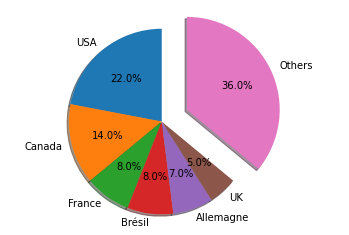

In [17]:
import matplotlib.pyplot as plt

labels = 'USA', 'Canada', 'France', 'Brésil', 'Allemagne', 'UK', "Others"
sizes = [22, 14, 8, 8, 7, 5, 36]
explode = (0, 0, 0, 0, 0, 0, 0.3)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

plt.show()